In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from astropy.timeseries import LombScargle
from scipy.optimize import curve_fit
from google.colab import drive
drive.mount('/content/drive')

# Font Grafik
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10

Mounted at /content/drive


In [3]:
# Data
df = pd.read_excel('/content/drive/My Drive/Kuliah/Astronomi/Akademik/Semester-5/Tugas-UAS-Aspeng/Pengamatan/data-hasilreduksi-apperture.xlsx', sheet_name='rapi')
df.head()

,slice,J.D.-2400000,JD_UTC,HJD,Siklus,Fluks_GPAnd,Fluks_PSF,Ferr_GPAnd,Fluks_TYC1521,Ferr_TYC1521,...,M_GPAnd_C3,do_GP.1,do_C3,Merr_GPAnd_C3,M_PSF,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,60624.015304,2.460624e+06,2.460624e+06,37634.47085,139392.937247,129392.9372,434.187739,104797.570498,393.684154,...,10.816217,-0.000008,0.000007,0.004700,10.897043,NaN,NaN,NaN,NaN,NaN
1,2,60624.016391,2.460624e+06,2.460624e+06,37634.48492,140858.078275,130858.0783,431.985423,103818.220672,386.983085,...,10.815380,-0.000008,0.000007,0.004623,10.895334,NaN,NaN,NaN,Sumber Data,Periode (hari)
2,3,60624.017469,2.460624e+06,2.460624e+06,37634.49884,143473.262051,133473.2621,438.676581,105636.398072,393.748350,...,10.802667,-0.000008,0.000007,0.004630,10.881109,NaN,NaN,NaN,"Rodríguez et al., 2000",0.0787
3,4,60624.018547,2.460624e+06,2.460624e+06,37634.51276,148624.643903,138624.6439,440.189516,105558.701459,388.544829,...,10.762856,-0.000007,0.000007,0.004533,10.838482,NaN,NaN,NaN,Pengamatan kami (2024),0.0773
4,5,60624.019625,2.460624e+06,2.460624e+06,37634.52667,150694.696269,140694.6963,446.261101,105981.587980,393.840173,...,10.747815,-0.000007,0.000007,0.004556,10.822365,NaN,NaN,NaN,NaN,NaN


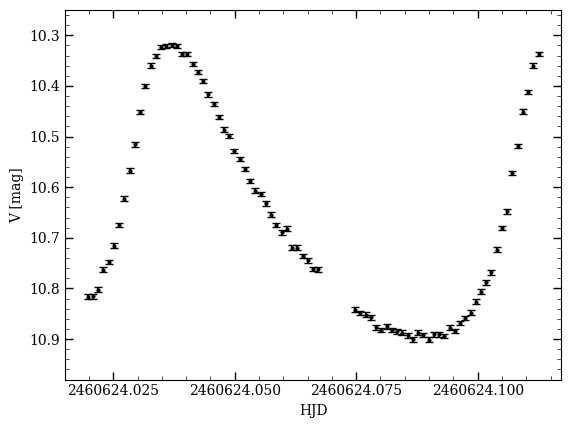

In [4]:


plt.errorbar(df['HJD'], df['M_GPAnd_C3'], yerr = df['Merr_GPAnd_C3'], fmt='o', color='black', ecolor='black',capsize=3, markersize=2, label='Data')
plt.xlabel('HJD')
plt.ylabel('V [mag]')
#plt.title('Kurva Cahaya GP And')
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x') # Menampilkan HJD tanpa notasi ilmiah
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
plt.ylim(bottom=10.98, top=10.25)
plt.minorticks_on() # Garis skala
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=3, width=0.5)
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=6, width=1)
plt.show()

## Cobain LOMB Scargle

Periode terbaik: 5.010146273307897 hari


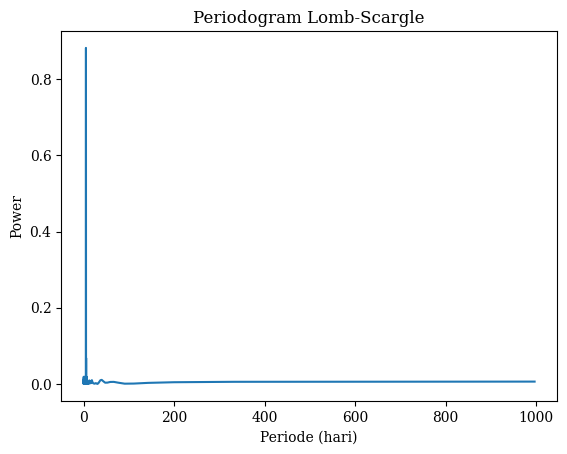

In [5]:
# COBAIN LOMB SCARGLE
# Waktu pengamatan (dalam hari) dengan interval tidak teratur
time = np.random.uniform(0, 100, 1000)

# Amplitudo dan frekuensi sebenarnya
amplitude = 2.0
frequency = 1.0 / 5.0  # Periode 5 hari

# Sinyal periodik dengan noise
signal = amplitude * np.sin(2 * np.pi * frequency * time) + np.random.normal(0, 0.5, len(time))

# Buat objek LombScargle
frequency, power = LombScargle(time, signal).autopower()

# Konversi frekuensi ke periode
period = 1.0 / frequency

# Temukan indeks periode maksimum
index = np.argmax(power)
best_period = period[index]
print("Periode terbaik:", best_period, "hari")

# Visualisasi
plt.plot(period, power)
plt.xlabel('Periode (hari)')
plt.ylabel('Power')
plt.title('Periodogram Lomb-Scargle')
plt.show()

## LOMB SCARGLE BUAT GP AND

In [6]:
# LOMB SCARGLE buat GP And

# Hitung bobot (galat)
bobot = 1 / df['Merr_GPAnd_C3']**2

# Durasi Observasi
duration = df['HJD'].max() - df['HJD'].min()

# Hitung perbedaan waktu rata-rata antara pengamatan
avgtime_diff = np.mean(np.diff(df['HJD']))
sampling_rate = 1 / avgtime_diff

# Menentukan frekuensi Nyquist
nyquist_freq = sampling_rate / 2

# Batas min dan max frekuensi
min_freq = 1/duration   # periode maximum
max_freq = nyquist_freq     # tebakan periode minimum 0,1 jam

# Perhitungan periodegram Lomb-Scargle dengan bobot
frequency, power = LombScargle(df['HJD'], df['M_GPAnd_C3'], dy=df['Merr_GPAnd_C3']).autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)

# Konversi frekuensi ke periode
period = 1 / frequency

# Temukan indeks periode maksimum
index = np.argmax(power)
best_period = period[index]

# Konversi periode ke jam
bestfreq = 1/best_period
bestperiod_h = best_period * 24

print("Periode terbaik:", best_period, "(hari) atau",bestperiod_h, "jam")
print("Frekuensi:", bestfreq, "siklus/hari")

Periode terbaik: 0.07733080031660695 (hari) atau 1.855939207598567 jam
Frekuensi: 12.931458046545625 siklus/hari


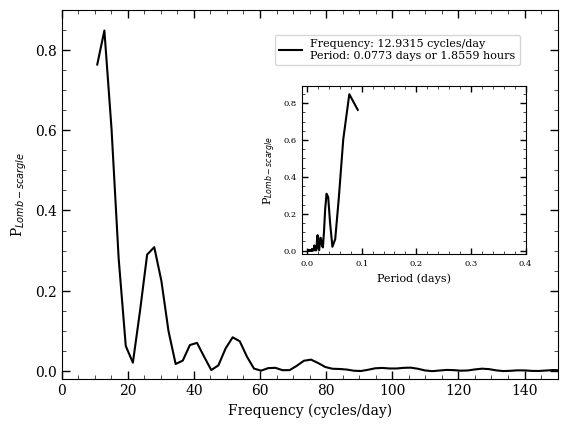

In [7]:
# PLOT LOMB SCARGLE GACOR

# Smooter power

# Plot frekuensi siklus per hari (main plot)
fig, ax1 = plt.subplots()  # Create main plot with axes object ax1
ax1.plot(frequency, power, color='black', label=f'Frequency: {bestfreq:.4f} cycles/day\nPeriod: {best_period:.4f} days or {bestperiod_h:.4f} hours')
ax1.set_xlabel('Frequency (cycles/day)')
ax1.set_ylabel('P$_{Lomb-scargle}$')
ax1.set_xlim(left=-0.01, right=150)
ax1.set_ylim(bottom=-0.02, top=0.9)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='minor', direction='in', top=True, right=True,
                length=3, width=0.5)
ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True,
                length=6, width=1)

# Create subplot for period curve (inset plot)
ax2 = fig.add_axes([0.5, 0.37, 0.35, 0.35])  # Adjust position and size as needed
ax2.plot(period, power, color='black')
ax2.set_xlabel('Period (days)', fontsize=8)  # Adjust font size as needed
ax2.set_ylabel('P$_{Lomb-scargle}$', fontsize=8)
ax2.set_xlim(left=-0.01, right=0.4)
ax2.set_ylim(bottom=-0.02)
ax2.minorticks_on()
ax2.tick_params(axis='both', which='minor', direction='in', top=True, right=True,
                length=2, width=0.5)  # Adjust tick size as needed
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True,
                length=4, width=1, labelsize=6)

ax1.legend(loc=[0.43, 0.85], fontsize=8)
plt.show()

## 3 Terms Fourier Series

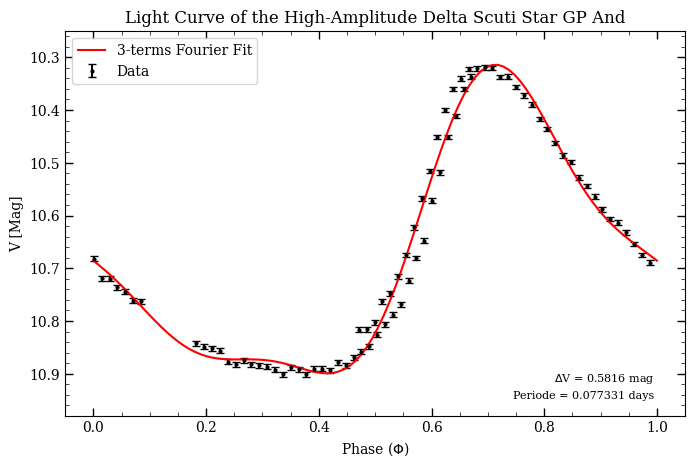

In [8]:
# PLOT KURVA CAHYAA GACOR

# Lipat Fase
phase = df['Siklus'] % 1
delta_mag = df['M_GPAnd_C3'].max() - df['M_GPAnd_C3'].min()
amplitude = delta_mag / 2

# Fitting dengan 3 terms Fourier Series
def fourier_series(x, a0, a1, b1, a2, b2, a3, b3):
    return a0 + a1 * np.cos(2 * np.pi * x) + b1 * np.sin(2 * np.pi * x) + \
           a2 * np.cos(2 * np.pi * 2 * x) + b2 * np.sin(2 * np.pi * 2 * x) + \
           a3 * np.cos(2 * np.pi * 3 * x) + b3 * np.sin(2 * np.pi * 3 * x)
popt, pcov = curve_fit(fourier_series, phase, df['M_GPAnd_C3'], sigma=df['Merr_GPAnd_C3'])

# Buat model data hasil fitting
phase_fit = np.linspace(0, 1, 100)
mag_fit = fourier_series(phase_fit, *popt)

# Plot kurva cahaya magnitude vs. phase
plt.figure(figsize=(8, 5))
plt.errorbar(phase, df['M_GPAnd_C3'], yerr = df['Merr_GPAnd_C3'], fmt='o', color='black', ecolor='black',capsize=3, markersize=2, label='Data')
plt.plot(phase_fit, mag_fit, color='red', label='3-terms Fourier Fit')
plt.xlabel('Phase ($\Phi$)')
plt.ylabel('V [Mag]')
plt.title('Light Curve of the High-Amplitude Delta Scuti Star GP And')
plt.gca().invert_yaxis()  # Invert sb y buat magnitudo
plt.ylim(bottom=10.98, top=10.25)
plt.minorticks_on() # Garis skala
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=3, width=0.5)
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=6, width=1)
plt.text(0.95, 0.04, f'Periode = {best_period:.6f} days', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.08, f'$\Delta$V = {delta_mag:.4f} mag', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.legend(loc='upper left', fontsize=10)
plt.show()

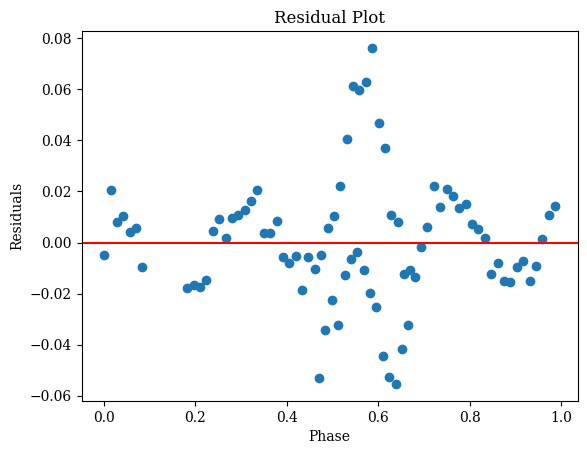

RMSE: 0.024413353012137304
AIC: -587.445256767773
BIC: -570.6841126850659


In [9]:
# Cek apakah 3 terms cocok

# Hitung residual
residuals = df['M_GPAnd_C3'] - fourier_series(phase, *popt)

# Plot residual
plt.plot(phase, residuals, 'o')
plt.axhline(y=0, color='r', linestyle='-')  # Garis horizontal di y=0
plt.xlabel('Phase')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Hitung RMSE
rmse = np.sqrt(np.mean(residuals**2))
print("RMSE:", rmse)

# Hitung AIC dan BIC
n = len(df['M_GPAnd_C3'])  # Jumlah data
k = len(popt)  # Jumlah parameter model
aic = n * np.log(rmse**2) + 2 * k
bic = n * np.log(rmse**2) + k * np.log(n)
print("AIC:", aic)
print("BIC:", bic)

## 5 Terms Fourier Series

[0.77685204 0.79092031 0.80483908 0.81875773 0.83267637 0.84659515
 0.86066341 0.87458218 0.88850083 0.90241947 0.91633825 0.93040651
 0.94432516 0.95824393 0.97216258 0.98608123 1.         1.01406826
 1.02798704 1.04190569 1.05582433 1.0697431  1.08366175 1.09773001
 1.11164879 1.12556743 1.13948608 1.15340485 1.16747312 1.18139189
 1.19531053 1.20922918 1.22314796 1.23721622 1.25113486 1.26505364
 1.27897228 1.29289093 1.30680971 1.32087797 1.33479675 1.34871539
 1.36263404 1.37655281 1.39062107 1.48880019 0.50271884 0.51663761
 0.53055626 0.5444749  0.55839355 0.57246194 0.58638058 0.60029936
 0.61421801 0.6282864  0.64220504 0.65612369 0.67004247 0.68396111
 0.69802937 0.71194815 0.7258668  0.73978544 0.75370421 0.76777248
 0.78169125 0.7956099  0.80952854 0.82344719 0.83751558 0.85143423
 0.865353   0.87927164 0.89319029 0.90725868 0.92102771 0.93509597
 0.94901475 0.96293339 0.97685204]


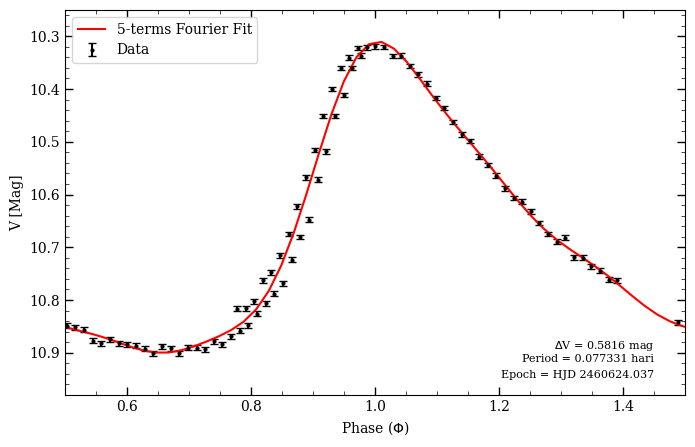

Amplitudo = 0.2908 mag


In [10]:
# PLOT KURVA CAHYAA GACOR (5 TERMS)

# LIPAT FASE
# Cari HJD saat nilai magnitudo paling cerah
index_min = df['M_GPAnd_C3'].idxmin()
HJDmax = df['HJD'][index_min]
phase = np.where(((df['HJD'] - HJDmax) / best_period % 1) < 0.5,
                 ((df['HJD'] - HJDmax) / best_period % 1) + 1,  # Geser fase +1
                 ((df['HJD'] - HJDmax) / best_period % 1))
print(phase)

delta_mag = df['M_GPAnd_C3'].max() - df['M_GPAnd_C3'].min()
amplitude = delta_mag / 2

# Fitting dengan 5 terms Fourier Series
def fourier_series(x, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5):
    return a0 + a1 * np.cos(2 * np.pi * x) + b1 * np.sin(2 * np.pi * x) + \
           a2 * np.cos(2 * np.pi * 2 * x) + b2 * np.sin(2 * np.pi * 2 * x) + \
           a3 * np.cos(2 * np.pi * 3 * x) + b3 * np.sin(2 * np.pi * 3 * x) + \
           a4 * np.cos(2 * np.pi * 4 * x) + b4 * np.sin(2 * np.pi * 4 * x) + \
           a5 * np.cos(2 * np.pi * 5 * x) + b5 * np.sin(2 * np.pi * 5 * x)
popt, pcov = curve_fit(fourier_series, phase, df['M_GPAnd_C3'], sigma=df['Merr_GPAnd_C3'])
phase_fit = np.linspace(0, 2, 100)
mag_fit = fourier_series(phase_fit, *popt)

# Plot kurva cahaya magnitude vs. phase
plt.figure(figsize=(8, 5))
plt.errorbar(phase, df['M_GPAnd_C3'], yerr = df['Merr_GPAnd_C3'], fmt='o', color='black', ecolor='black',capsize=3, markersize=2, label='Data')
plt.plot(phase_fit, mag_fit, color='red', label='5-terms Fourier Fit')
plt.xlabel('Phase ($\Phi$)')
plt.ylabel('V [Mag]')
#plt.title('Light Curve of the High-Amplitude Delta Scuti Star GP And')
plt.gca().invert_yaxis()  # Invert sb y buat magnitudo
plt.xlim(left=0.5, right=1.5)
plt.ylim(bottom=10.98, top=10.25)
plt.minorticks_on() # Garis skala
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=3, width=0.5)
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=6, width=1)
plt.text(0.95, 0.08, f'Period = {best_period:.6f} hari', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.11, f'$\Delta$V = {delta_mag:.4f} mag', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.04, f'Epoch = HJD {HJDmax:.3f}', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# print
print(f"Amplitudo = {amplitude:.4f} mag")

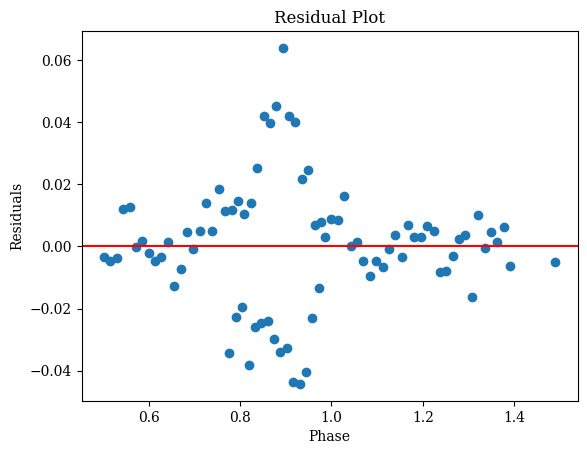

RMSE: 0.02012926066182317
AIC: -610.7040844452624
BIC: -584.3651437438656


In [11]:
# Cek apakah 5 terms cocok

# Hitung residual
residuals = df['M_GPAnd_C3'] - fourier_series(phase, *popt)

# Plot residual
plt.plot(phase, residuals, 'o')
plt.axhline(y=0, color='r', linestyle='-')  # Garis horizontal di y=0
plt.xlabel('Phase')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Hitung RMSE
rmse = np.sqrt(np.mean(residuals**2))
print("RMSE:", rmse)

# Hitung AIC dan BIC
n = len(df['M_GPAnd_C3'])  # Jumlah data
k = len(popt)  # Jumlah parameter model
aic = n * np.log(rmse**2) + 2 * k
bic = n * np.log(rmse**2) + k * np.log(n)
print("AIC:", aic)
print("BIC:", bic)

## 7 Terms Fourier Series

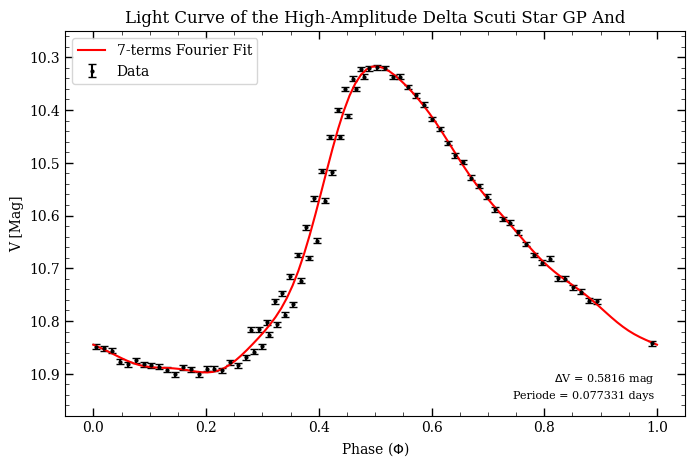

In [12]:
# PLOT KURVA CAHYAA GACOR (7 TERMS)

# Lipat Fase
phase = (df['HJD'] / best_period) % 1
delta_mag = df['M_GPAnd_C3'].max() - df['M_GPAnd_C3'].min()
amplitude = delta_mag / 2

# Fitting dengan 3 terms Fourier Series
def fourier_series(x, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5, a6, b6, a7, b7):
    return a0 + a1 * np.cos(2 * np.pi * x) + b1 * np.sin(2 * np.pi * x) + \
           a2 * np.cos(2 * np.pi * 2 * x) + b2 * np.sin(2 * np.pi * 2 * x) + \
           a3 * np.cos(2 * np.pi * 3 * x) + b3 * np.sin(2 * np.pi * 3 * x) + \
           a4 * np.cos(2 * np.pi * 4 * x) + b4 * np.sin(2 * np.pi * 4 * x) + \
           a5 * np.cos(2 * np.pi * 5 * x) + b5 * np.sin(2 * np.pi * 5 * x) + \
           a6 * np.cos(2 * np.pi * 6 * x) + b6 * np.sin(2 * np.pi * 6 * x) + \
           a7 * np.cos(2 * np.pi * 7 * x) + b7 * np.sin(2 * np.pi * 7 * x)

popt, pcov = curve_fit(fourier_series, phase, df['M_GPAnd_C3'], sigma=df['Merr_GPAnd_C3'])

# Buat model data hasil fitting
phase_fit = np.linspace(0, 1, 100)
mag_fit = fourier_series(phase_fit, *popt)

# Plot kurva cahaya magnitude vs. phase
plt.figure(figsize=(8, 5))
plt.errorbar(phase, df['M_GPAnd_C3'], yerr = df['Merr_GPAnd_C3'], fmt='o', color='black', ecolor='black',capsize=3, markersize=2, label='Data')
plt.plot(phase_fit, mag_fit, color='red', label='7-terms Fourier Fit')
plt.xlabel('Phase ($\Phi$)')
plt.ylabel('V [Mag]')
plt.title('Light Curve of the High-Amplitude Delta Scuti Star GP And')
plt.gca().invert_yaxis()  # Invert sb y buat magnitudo
plt.ylim(bottom=10.98, top=10.25)
plt.minorticks_on() # Garis skala
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=3, width=0.5)
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=6, width=1)
plt.text(0.95, 0.04, f'Periode = {best_period:.6f} days', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(0.95, 0.08, f'$\Delta$V = {delta_mag:.4f} mag', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.legend(loc='upper left', fontsize=10)
plt.show()

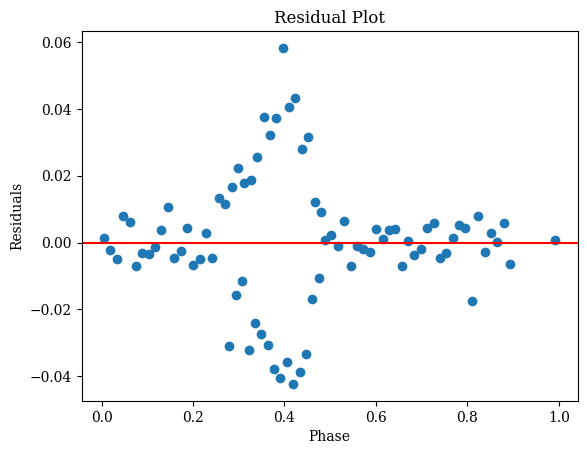

RMSE: 0.01933258984578731
AIC: -609.2460082834983
BIC: -573.3292709634118


In [13]:
# Cek apakah 7 terms cocok

# Hitung residual
residuals = df['M_GPAnd_C3'] - fourier_series(phase, *popt)

# Plot residual
plt.plot(phase, residuals, 'o')
plt.axhline(y=0, color='r', linestyle='-')  # Garis horizontal di y=0
plt.xlabel('Phase')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Hitung RMSE
rmse = np.sqrt(np.mean(residuals**2))
print("RMSE:", rmse)

# Hitung AIC dan BIC
n = len(df['M_GPAnd_C3'])  # Jumlah data
k = len(popt)  # Jumlah parameter model
aic = n * np.log(rmse**2) + 2 * k
bic = n * np.log(rmse**2) + k * np.log(n)
print("AIC:", aic)
print("BIC:", bic)